In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import shapefile as shp


In [2]:
df1 = pd.read_excel("1hls.xlsx")
df1.head()

,t_r,viloyatlar_nomi,tuman,familiya,ism,ota_ism,yoshi,jinsi,yurgan_qadami,ortacha_kunlik,respublika_rekord,hududiy_rekord,tuman_rekord,jami
0,1,Andijon vil.,Andijon shahar,Usmonov,Doniyorbek,Xakimjon o‘g‘li,23,erkak,443134,14771.133333,NaN,NaN,300000,300000
1,2,Andijon vil.,Xonobod shahar,Teshabayeva,Xurshidaxon,Jumabayevna,51,ayol,190569,6352.300000,NaN,NaN,300000,300000
2,3,Andijon vil.,Andijon tumani,Yusupov,Abduraxmonbek,Nodirjon o‘g‘li,28,erkak,400402,13346.733333,NaN,NaN,300000,300000
3,4,Andijon vil.,Asaka tumani,Qo‘chqarov,Mavlonbek,Tursunboy o‘gli,30,erkak,341870,11395.666667,NaN,NaN,300000,300000
4,5,Andijon vil.,Baliqchi tumani,Ibrohimov,Temurbek,Ulug‘bek o‘g‘li,25,erkak,141785,4726.166667,NaN,NaN,300000,300000


In [3]:
average_step_region = df1.groupby("viloyatlar_nomi")["yurgan_qadami"].mean()

In [4]:
average_step_region.columns = ["viloyatlar", "o'rtacha_oylik_qadam"]

In [5]:
average_step_region = average_step_region.reset_index()

In [6]:
average_step_region.columns

Index(['viloyatlar_nomi', 'yurgan_qadami'], dtype='object')

In [7]:
average_step_region

,viloyatlar_nomi,yurgan_qadami
0,Andijon vil.,238799.625000
1,Buxoro vil.,264735.846154
2,Farg'ona vil.,263172.894737
3,Jizzax vil.,231521.538462
4,Namangan vil.,247683.166667
5,Navoiy vil.,263226.000000
6,Qashqadaryo vil.,311510.000000
7,Qoraqalpog'iston Res.,298518.437500
8,Samarqand vil.,318410.250000
9,Sirdaryo vil.,267654.727273


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

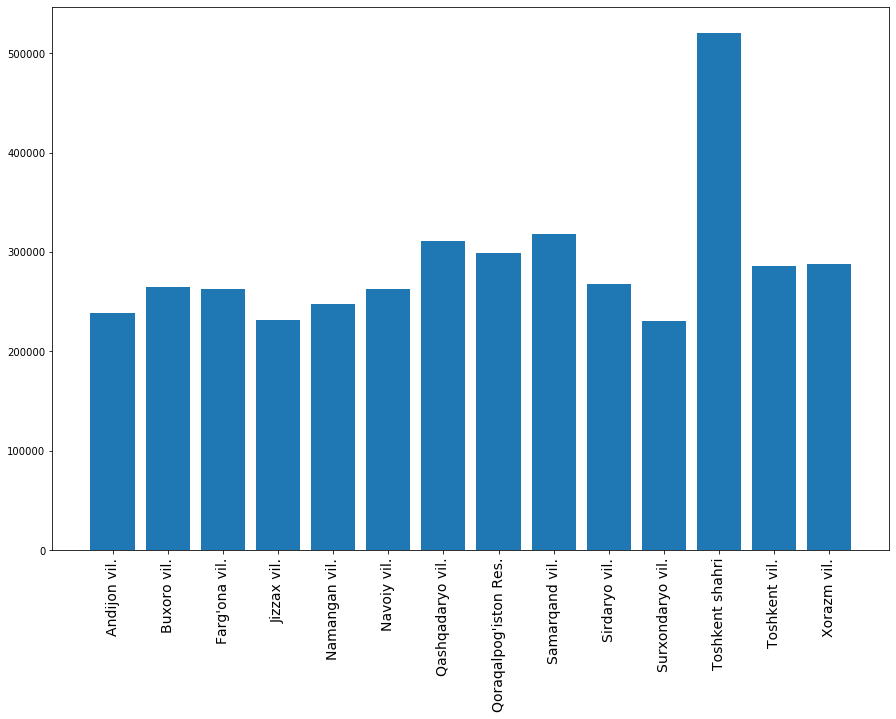

In [8]:
plt.figure(figsize=(15,10))
plt.bar(average_step_region["viloyatlar_nomi"], average_step_region["yurgan_qadami"])
plt.xticks( rotation='vertical', fontsize=14)

In [9]:
gender = df1["jinsi"].value_counts()
gender

erkak    188
ayol      15
Name: jinsi, dtype: int64

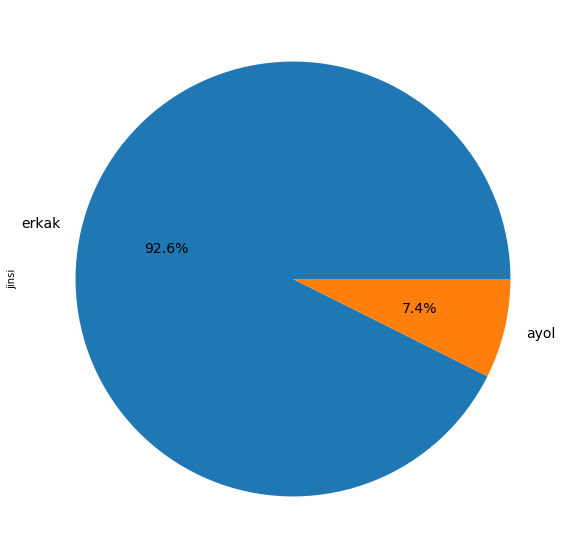

In [10]:
plt.figure(figsize=(15,10))
gender.plot.pie(autopct="%.1f%%", textprops={'fontsize': 14})
plt.rcParams['font.size'] = 9.0

In [11]:
least_walking = df1.nsmallest(10, "yurgan_qadami")
least_walking

,t_r,viloyatlar_nomi,tuman,familiya,ism,ota_ism,yoshi,jinsi,yurgan_qadami,ortacha_kunlik,respublika_rekord,hududiy_rekord,tuman_rekord,jami
190,191,Surxondaryo vil.,Bandixon tumani,Uraqov,Soatmurod,Shomurod o‘g‘li,24,erkak,42739,1424.633333,NaN,NaN,300000,300000
200,201,Surxondaryo vil.,Termiz tumani,Malikov,Saloxiddin,Abdumannon o‘g‘U,20,erkak,87844,2928.133333,NaN,NaN,300000,300000
64,65,Navoiy vil.,Tomdi tumani,Abdixaniyev,Nursultan,Kusherbay uli,21,erkak,95323,3177.433333,NaN,NaN,300000,300000
161,162,Xorazm vil.,Tuproqqal’a tumani,Jumaboyev,Rasulbek,Oybek o‘g‘li,22,erkak,108882,3629.400000,NaN,NaN,300000,300000
13,14,Andijon vil.,Xo‘jaobod tumani,Abdusamatov,Muxammadrasul,Otabek o‘g‘li,21,erkak,113969,3798.966667,NaN,NaN,300000,300000
7,8,Andijon vil.,Izboskan tumani,Qambarov,Shukurjon,Nurdinboy o‘g‘li,27,erkak,115542,3851.400000,NaN,NaN,300000,300000
194,195,Surxondaryo vil.,Qiziriq tumani,Soatov,Ulug‘bek,Nurilla o‘g‘li,23,erkak,122317,4077.233333,NaN,NaN,300000,300000
29,30,Jizzax vil.,Amasoy tumani,Musallamov,Sirojiddin,Shavkat o‘g‘li,26,erkak,128336,4277.866667,NaN,NaN,300000,300000
202,203,Surxondaryo vil.,Uzun tumani,Rajabov,Ural,Jumanazarovich,41,erkak,129075,4302.500000,NaN,NaN,300000,300000
189,190,Toshkent shahri,Yangihayot tumani,Mustanov,Sanjarbek,Qaxramon o‘g‘li,31,erkak,132320,4410.666667,NaN,NaN,300000,300000


In [12]:
most_walking = df1.nlargest(10, "yurgan_qadami")
most_walking 

,t_r,viloyatlar_nomi,tuman,familiya,ism,ota_ism,yoshi,jinsi,yurgan_qadami,ortacha_kunlik,respublika_rekord,hududiy_rekord,tuman_rekord,jami
188,189,Toshkent shahri,Yashnobod tumani,Axmadullin,Timur,Rafikovich,34,erkak,890947,29698.233333,1000000.0,500000.0,300000,1800000
95,96,Surxondaryo vil.,Angor tumani,Qoraboyev,Ramazon,Uchqun o‘g‘li,24,erkak,768031,25601.033333,NaN,500000.0,300000,800000
187,188,Toshkent shahri,Yakkasaroy tumani,Xusanov,Furqatjon,Xusan o‘g‘U,31,erkak,717061,23902.033333,NaN,NaN,300000,300000
184,185,Toshkent shahri,Chilonzor tumani,Imamutdinov,Artur,Maksimovich,21,erkak,634837,21161.233333,NaN,NaN,300000,300000
185,186,Toshkent shahri,Shayxontohur tumani,Ibroximov,Abdulazizbek,Dilshodbek o‘g‘li,20,erkak,631560,21052.000000,NaN,NaN,300000,300000
115,182,Toshkent shahri,Olmazor tumani,Kalimullina,Tatyana,Dmitriyevna,57,ayol,596003,19866.766667,NaN,NaN,300000,300000
182,183,Toshkent shahri,Sergeli tumani,Lyabin,Anatoliy,Yurevich,25,erkak,558308,18610.266667,NaN,NaN,300000,300000
112,113,Toshkent vil.,Bo‘stonliq tumani,Furkatov,Firo‘z,Furkat ug‘li,25,erkak,545710,18190.333333,NaN,500000.0,300000,800000
79,80,Samarqand vil.,Samarqand shahri,Toxirov,Daler,Mirbaxodirovich,21,erkak,510830,17027.666667,NaN,500000.0,300000,800000
197,198,Surxondaryo vil.,Muzrabot tumani,Choriyev,Xayrulla,Pardayevich,46,erkak,504187,16806.233333,NaN,NaN,300000,300000


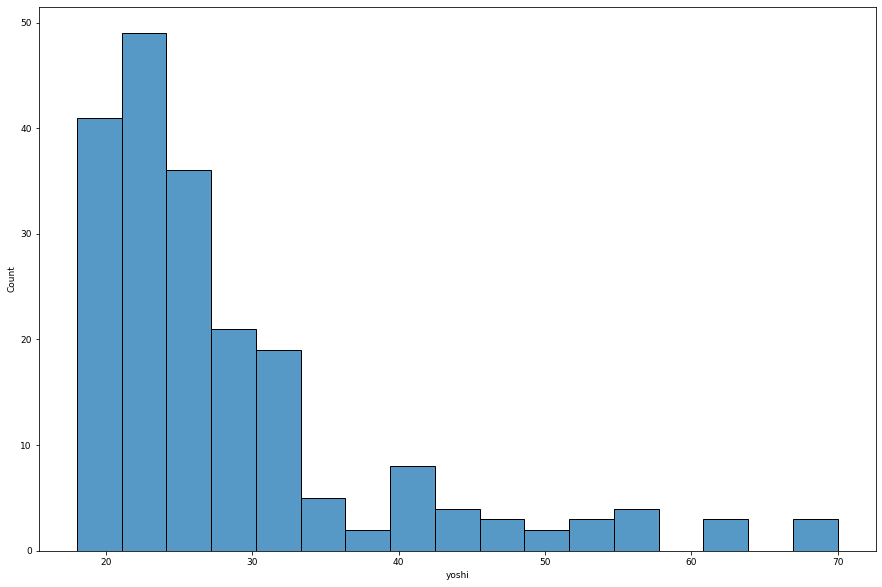

In [13]:
plt.figure(figsize=(15,10))
sns.histplot(data = df1, x = "yoshi")

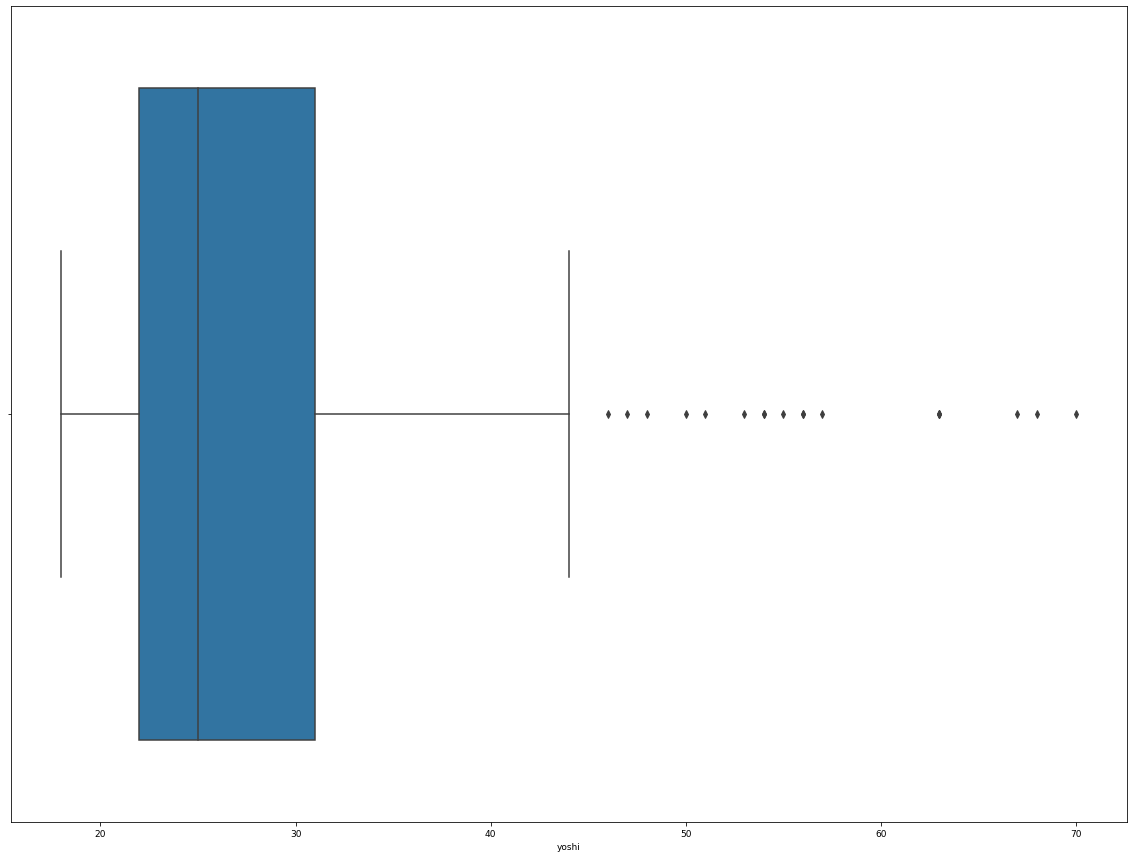

In [14]:
plt.figure(figsize=(20,15))
sns.boxplot( x = "yoshi", data = df1)
sns.set_theme(style="whitegrid")
sns.set(font_scale = 4)


In [15]:
elderly = df1[df1["yoshi"]>55]
elderly

,t_r,viloyatlar_nomi,tuman,familiya,ism,ota_ism,yoshi,jinsi,yurgan_qadami,ortacha_kunlik,respublika_rekord,hududiy_rekord,tuman_rekord,jami
8,9,Andijon vil.,Jalaquduq tumani,Zokirova,Ominaxon,Abdullayevna,56,ayol,229113,7637.100000,NaN,NaN,300000,300000
51,52,Qashqadaryo vil.,Mirishkor tumani,Qurbonov,Bozorboy,Jonqulovich,70,erkak,289110,9637.000000,NaN,NaN,300000,300000
83,84,Samarqand vil.,Ishtixon tumani,Muminov,Xushvakt,Kuvandikovich,67,erkak,366531,12217.700000,NaN,NaN,300000,300000
90,91,Samarqand vil.,Paxtachi tumani,Saribayev,Azim,NaN,68,erkak,502950,16765.000000,NaN,NaN,300000,300000
113,192,Surxondaryo vil.,Boysun tumani,Tolipova,Dilobarxon,Axmadjonovna,63,ayol,143371,4779.033333,NaN,NaN,300000,300000
115,182,Toshkent shahri,Olmazor tumani,Kalimullina,Tatyana,Dmitriyevna,57,ayol,596003,19866.766667,NaN,NaN,300000,300000
138,139,Farg'ona vil.,So‘x turn an i,Ashurov,Xaitjon,Xaydarovich,63,erkak,425325,14177.500000,NaN,500000.0,300000,800000
169,170,Qoraqalpog'iston Res.,Qo‘ng‘irot tumani,Utekov,Kuatbay,Kazakovich,56,erkak,392087,13069.566667,NaN,NaN,300000,300000
183,184,Toshkent shahri,Uchtepa tumani,Mavlyanov,Uktam,Alimovich,63,erkak,475264,15842.133333,NaN,NaN,300000,300000


In [16]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [17]:
sf = shp.Reader("uzb_admbnda_adm1_2018b.shp")

In [18]:
len(sf.shapes())

14

In [19]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [20]:
df = read_shapefile(sf)
df.shape

(14, 13)

In [21]:
df.head()

,ADM0_EN,ADM0_RU,ADM0_UZ,ADM0ALT1EN,ADM0_PCODE,ADM1_EN,ADM1_RU,ADM1_UZ,ADM1TYPE_E,ADM1TYPE_R,ADM1TYPE_U,ADM1_PCODE,coords
0,Uzbekistan,Республика Узбекистан,O'zbekiston Respublikasi,Republic of Uzbekistan,UZ,Andizhan,Андижанская,Andijon,province,область,viloyati,UZ03,"[(72.35866494475906, 41.064262062192235), (72...."
1,Uzbekistan,Республика Узбекистан,O'zbekiston Respublikasi,Republic of Uzbekistan,UZ,Bukhara,Бухарская,Buxoro,province,область,viloyati,UZ06,"[(63.67380106167065, 40.67515506182987), (63.6..."
2,Uzbekistan,Республика Узбекистан,O'zbekiston Respublikasi,Republic of Uzbekistan,UZ,Dzhizak,Джизакская,Jizzax,province,область,viloyati,UZ08,"[(67.32945994007521, 41.202655062321135), (67...."
3,Uzbekistan,Республика Узбекистан,O'zbekiston Respublikasi,Republic of Uzbekistan,UZ,Fergana,Ферганская,Farg'ona,province,область,viloyati,UZ30,"[(71.83503694427134, 39.985980061188044), (71...."
4,Uzbekistan,Республика Узбекистан,O'zbekiston Respublikasi,Republic of Uzbekistan,UZ,Kashkadarya,Кашкадарьинская,Qashqadaryo,province,область,viloyati,UZ10,"[(65.7539439386079, 39.510505060745196), (65.7..."


In [22]:
def calc_color(data, color=None):
        if color   == 1: color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; colors = 'YlGnBu';
        elif color == 3: color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; colors = 'Greys';
        elif color == 9: color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [23]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.ADM1_EN == i].index.values[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [24]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


1: 230938 => 240279 
2: 240280 => 263189 
3: 263190 => 266194 
4: 266195 => 287232 
5: 287233 => 309343 
6: 309344 => 520659 

   1   2   3   4   5   6


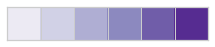

<Figure size 792x648 with 0 Axes>

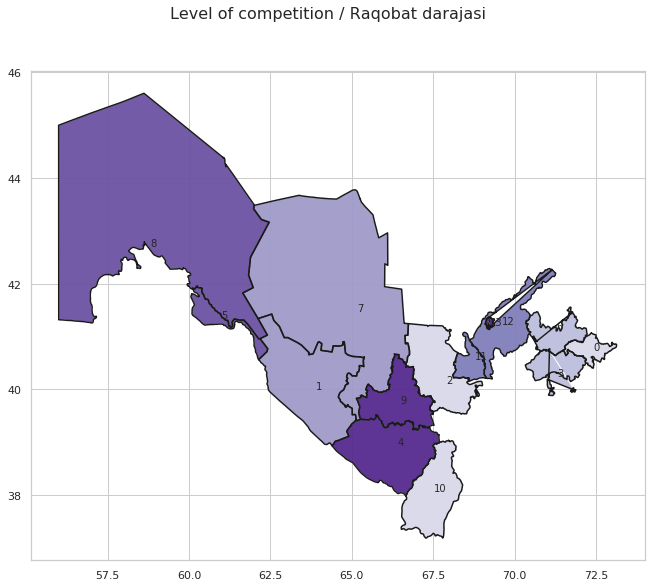

In [25]:
south = ['Andizhan', 'Bukhara', 'Dzhizak', 'Fergana', 'Kashkadarya', 'Khorezm', 'Namangan', 'Navoi', 'Republic of Karakalpakstan', 'Samarkand', 'Surkhandarya', 'Syrdarya', 'Tashkent', 'Tashkent city']
data = [238799.625, 264735.8462, 231521.5385, 263172.8947, 311510, 287822.3077, 247683.1667, 263226, 298518.4375, 318410.25, 230938.5333, 267654.7273, 286056.7273, 520660.6667]
print_id = True # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_comunas_data(sf, 'Level of competition / Raqobat darajasi', south, data, color_pallete, print_id)

In [26]:
df.ADM1_EN

0                       Andizhan
1                        Bukhara
2                        Dzhizak
3                        Fergana
4                    Kashkadarya
5                        Khorezm
6                       Namangan
7                          Navoi
8     Republic of Karakalpakstan
9                      Samarkand
10                  Surkhandarya
11                      Syrdarya
12                      Tashkent
13                 Tashkent city
Name: ADM1_EN, dtype: object